In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
pd.set_option('display.max_rows', 100)

In [9]:
data = pd.read_csv('train_parab.csv')

In [10]:
test = pd.read_csv('test_parab.csv')

In [11]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,...,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,...,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,...,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,...,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,...,13.315819,1.681034,1.379310,1.587045,1.242817,10.747144,1.408046,0.039051,1.042425,B,0.763925,5.498902,3.423944,0.832518,7.375480,6.746988,6.942002,1.334611,18.256352,8.507281,2.503055,4.872157,2.573664,0.113967,12.554274,B,2.230754,1.990131,B,2.643678,J,NaN,13.777666,10.574713,1.511063,4.949609,7.180722,5.655086e-01,1.166281,1.956521,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,6.320087,NaN,10.991098,NaN,NaN,NaN,NaN,NaN,NaN,6.414567,HIT,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,6.083151,NaN,NaN,NaN,0,NaN,10.138920,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,A,NaN,T,G,14.097099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB


In [13]:
data.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,...,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,1.142370e+05,6.448500e+04,1.142350e+05,6.448900e+04,1.143170e+05,6.448500e+04,6.442600e+04,6.452500e+04,6.448900e+04,6.447800e+04,64481.000000,113710.000000,6.364600e+04,65702.000000,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,1.142100e+05,6.448900e+04,6.569700e+04,6.447800e+04,114321.000000,6.448500e+04,1.142100e+05,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,65702.000000,6.452500e+04,6.448900e+04,1.142350e+05,6.364300e+04,6.448500e+04,65702.000000,6.448900e+04,...,6.448500e+04,6.452500e+04,6.448900e+04,6.442600e+04,6.447000e+04,6.569700e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.363900e+04,6.448900e+04,65658.000000,6.448900e+04,65702.000000,6.448500e+04,6.447800e+04,6.448900e+04,6.448900e+04,6.447800e+04,6.448900e+04,6.447800e+04,6.566700e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.300500e+04,6.448900e+04,6.448900e+04,65663.000000,6.452500e+04,6.569700e+04,6.569700e+04,6.448900e+04,1.142910e+05,6.442600e+04,6.448500e+04,6.569700e+04,6.447800e+04,6.364100e+04,6.448500e+04,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,1.883046e+00,1.544741e+01,6.881304e+00,3.798396e+00,1.209428e+01,2.080911e+00,4.923222e+00,3.832270e+00,8.410455e-01,2.223005e-01,17.773592,7.029740,1.093088e+00,1.698129,1.876031e+00,2.743454e+00,5.093328e+00,8.206416e+00,1.622151e+00,2.161633e+00,6.406236e+00,8.122387e+00,1.337560e+01,7.414708e-01,0.090928,1.237184e+00,1.046593e+01,7.182551e+00,1.292497e+01,2.216597e+00,1.079517e+01,9.142231e+00,1.630525,1.253802e+01,8.016547e+00,1.504265e+00,7.198159e+00,1.571130e+01,1.253856,1.559556e+00,...,2.433303e+00,2.405056e+00,7.307366e+00,1.333448e+01,2.209700e+00,7.287174e+00,6.208356e+00,2.173808e+00,1.607956e+00,2.822253e+00,1.220184e+00,10.180216,1.924184e+00,1.518425,9.669126e-01,5.823668e-01,5.475185e+00,3.852883e+00,6.657576e-01,6.457952e+00,7.622554e+00,7.667624e+00,1.250721e+00,1.209162e+01,6.866414e+00,2.890289e+00,5.296716e+00,2.642828e+00,1.081045,1.179136e+01,2.152620e+00,4.181284e+00,3.365314e+00,1.357445e+01,1.054805e+01,2.291218e+00,8.303857e+00,8.364651e+00,3.168970e+00,1.291218e+00,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,1.393979e+00,7.900790e-01,9.244945e-01,1.175892e+00,1.443947e+00,7.329166e-01,1.791187e+00,1.911504e+00,6.162762e-01,1.713459e-01,1.155002,1.072271,4.003695e+00,2.956854,5.511957e-01,8.343556e-01,2.677940e+00,1.285432e+00,5.635237e-01,9.848598e-01,2.025179e+00,1.339802e+00,2.355631e+00,5.413723e-01,0.583478,2.358155e+00,3.169183e+00,1.004472e+00,9.969760e-01,6.479912e-01,2.110887e+00,2.064508e+00,2.895831,2.196164e+00,9.026805e-01,1.168329e+00,2.510385e+00,7.993680e-01,2.314476,8.343910e-01,...,7.986390e-01,1.383719e+00,1.256062e+00,1.843919e+00,1.074983e+00,2.223637e+00,3.678042e+00,1.062289e+00,9.412067e-01,1.423208e+00,4.658070e-01,3.000053,1.048548e+00,2.812902,1.789302e-01,2.402102e-01,1.640349e+00,8.549950e-01,2.641127e-01,1.120472e+00,1.924074e+00,2.325863e+00,4.614097e-01,6.888297e+00,2.354673e+00,1.824041e+00,1.228804e+00,8.857686e-01,2.247308,

In [35]:
test['target'] = -1
all_data = data.append(test)

Воспользуемся mutual information для нахождения лучших фичей.

In [18]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data_num = data[numerical_vars]
data_num.shape

(114321, 114)

In [19]:
mi = mutual_info_classif(data_num.drop(['target', 'ID'], axis=1).fillna(0), data_num['target'])

In [20]:
mi

array([0.00766535, 0.0140099 , 0.01071378, 0.00300278, 0.01121017,
       0.01059564, 0.00359156, 0.00723867, 0.02240357, 0.01109091,
       0.02176674, 0.01345842, 0.01928348, 0.0079287 , 0.00407435,
       0.01062192, 0.00329159, 0.00842044, 0.00745487, 0.01559781,
       0.00170423, 0.00758384, 0.00907772, 0.00943385, 0.00457024,
       0.01174978, 0.00978274, 0.00948007, 0.01038531, 0.0098741 ,
       0.00251367, 0.00226635, 0.00346577, 0.00878062, 0.00693681,
       0.01132135, 0.01017781, 0.01049254, 0.01426533, 0.01046333,
       0.00822622, 0.01066495, 0.01092858, 0.04210559, 0.0103314 ,
       0.01005595, 0.0075809 , 0.01147389, 0.01085453, 0.0088102 ,
       0.01039733, 0.01100266, 0.00963252, 0.02002106, 0.00774694,
       0.01216705, 0.01145993, 0.01097103, 0.01007343, 0.00103635,
       0.00831008, 0.01119244, 0.00896554, 0.00919961, 0.01024821,
       0.00454378, 0.00546739, 0.00362313, 0.00506961, 0.00933188,
       0.00974124, 0.01015293, 0.009426  , 0.00762723, 0.01123

In [21]:
mi = pd.Series(mi)
mi.index = data_num.drop(['target', 'ID'], axis = 1 ).columns
mi_sort = mi.sort_values(ascending=False).head(10)

In [22]:
mi_sort.index

Index(['v50', 'v10', 'v12', 'v62', 'v14', 'v21', 'v129', 'v44', 'v2', 'v123'], dtype='object')

In [23]:
mi_columns = ['v50', 'v10', 'v12', 'v62', 'v14', 'v129', 'v21', 'v123', 'v88', 'v42']

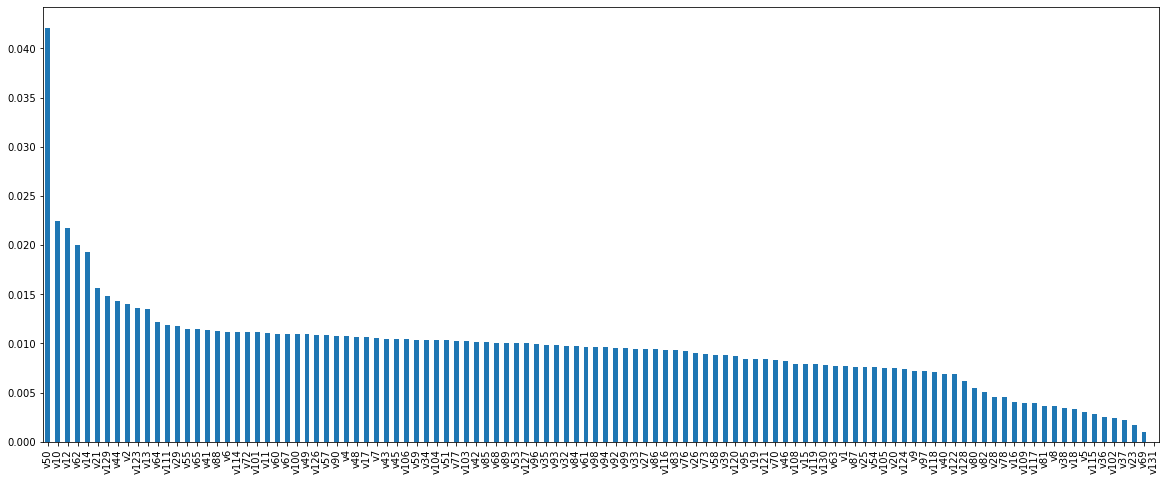

In [24]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Протестируем так же нахождения больших корреляций и наличие constant features.

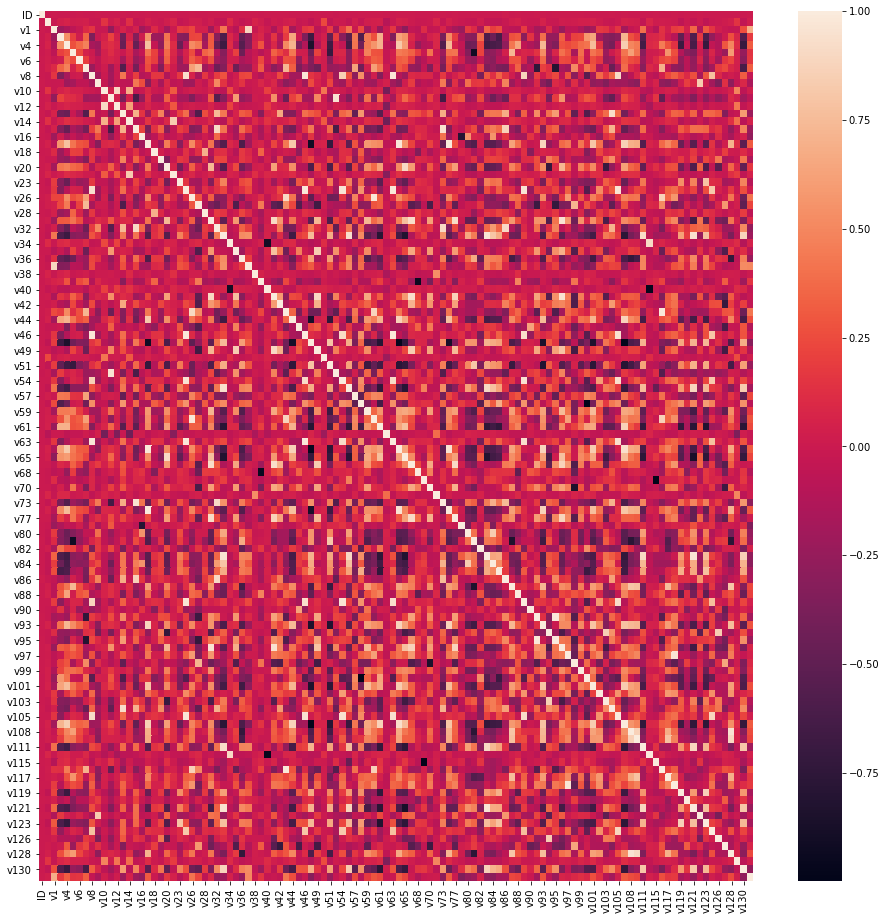

In [27]:
corrmat = data_num.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corrmat)

In [28]:
grouped_feature_ls = []
correlated_groups = []

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [30]:
corr_features = correlation(data_num, 0.9) 
correlated_features = set(corr_features) 
print(len(correlated_features))

38


In [31]:
correlated_features

{'v100',
 'v104',
 'v105',
 'v106',
 'v111',
 'v114',
 'v115',
 'v116',
 'v118',
 'v12',
 'v121',
 'v128',
 'v25',
 'v32',
 'v40',
 'v41',
 'v43',
 'v46',
 'v48',
 'v49',
 'v53',
 'v54',
 'v55',
 'v60',
 'v63',
 'v64',
 'v65',
 'v67',
 'v68',
 'v73',
 'v76',
 'v77',
 'v81',
 'v83',
 'v86',
 'v89',
 'v95',
 'v96'}

In [32]:
mi_columns = ['v50', 'v10', 'v62', 'v14', 'v129', 'v21', 'v13', 'v2', 'v44',
       'v42', 'v4', 'v7', 'v11', 'v86', 'v101', 'v111', 'v106', 'v29', 'v51']

In [42]:
good_columns = [
    "v10", "v12", "v14", "v21", "v22", "v24", "v30", "v31",
    "v34", "v38", "v40", "v47", "v50", "v52", "v56", "v62",
    "v66", "v72", "v75", "v79", "v91", "v112", "v113", "v114", "v129",
]

In [67]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(all_data[good_columns].select_dtypes(include=numerics).columns)

In [37]:
std_columns = []
for i in numerical_vars:
    if all_data[i].std() == 0:
        std_columns.append(i)
        

In [38]:
constant_features = [
    features for features in numerical_vars if all_data[features].std() == 0
]
len(constant_features)

0

In [44]:
objects = ['object']
object_vars = list(all_data[good_columns].select_dtypes(include=objects).columns)

In [45]:
object_vars

['v22',
 'v24',
 'v30',
 'v31',
 'v47',
 'v52',
 'v56',
 'v66',
 'v75',
 'v79',
 'v91',
 'v112',
 'v113']

In [46]:
objects = ['object']
object_vars_all = list(data.select_dtypes(include=objects).columns)

In [47]:
object_vars_all

['v3',
 'v22',
 'v24',
 'v30',
 'v31',
 'v47',
 'v52',
 'v56',
 'v66',
 'v71',
 'v74',
 'v75',
 'v79',
 'v91',
 'v107',
 'v110',
 'v112',
 'v113',
 'v125']

In [59]:
data['v47'].value_counts()

C    55425
I    39071
E     5301
F     4322
G     3946
D     3157
J     3010
B       50
A       38
H        1
Name: v47, dtype: int64

In [49]:
data['v110'].value_counts()

A    55688
B    55426
C     3207
Name: v110, dtype: int64

In [400]:
corr_col = ['v10', 'v12', 'v14', 'v21', 'v34', 'v38', 'v49', 'v50', 'v62', 'v64', 'v72', 'v114', 'v129']

In [68]:
all_columns = object_vars + numerical_vars + ['target']

In [69]:
all_columns_no_target = object_vars + numerical_vars

In [71]:
all_data[numerical_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228714 entries, 0 to 114392
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   v10     228548 non-null  float64
 1   v12     228544 non-null  float64
 2   v14     228708 non-null  float64
 3   v21     227530 non-null  float64
 4   v34     228499 non-null  float64
 5   v38     228714 non-null  int64  
 6   v40     228499 non-null  float64
 7   v50     228544 non-null  float64
 8   v62     228714 non-null  int64  
 9   v72     228714 non-null  int64  
 10  v114    228660 non-null  float64
 11  v129    228714 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 22.7 MB


In [66]:
all_data[object_vars] = all_data[object_vars].fillna('no_info')

In [72]:
from tqdm.notebook import tqdm

In [73]:
from tqdm.notebook import trange, tqdm

In [74]:
for i in trange(1000):
    for i in numerical_vars:
        all_data[i].fillna(all_data[i].median(), inplace=True)

In [75]:
all_data_end = all_data[all_columns]

In [76]:
all_data_end.head()

,v22,v24,v30,v31,v47,v52,v56,v66,v75,v79,v91,v112,v113,v10,v12,v14,v21,v34,v38,v40,v50,v62,v72,v114,v129,target
0,XDX,C,C,A,C,G,DI,C,D,E,A,O,no_info,0.503281,6.085711,11.636387,7.730923,7.270147,0,7.711453,0.899420,1,1,15.634907,0,1
1,GUV,C,C,A,E,G,DY,A,D,D,B,U,G,1.312910,6.507647,11.636386,6.763110,3.615077,0,14.305766,1.379210,2,2,10.308044,0,1
2,FQ,E,no_info,A,C,F,AS,A,B,E,G,S,no_info,0.765864,6.384670,9.603542,5.245035,4.043864,0,13.077201,0.604504,1,3,11.205561,2,1
3,ACUE,D,C,B,C,H,BW,A,D,B,B,J,no_info,6.542669,9.646653,14.094723,7.517125,8.703550,0,11.523045,3.329176,1,2,13.777666,1,1
4,HIT,E,no_info,A,I,H,no_info,C,D,C,G,T,G,1.050328,6.320087,10.991098,6.414567,6.083151,0,10.138920,1.364536,1,1,14.097099,0,1


In [78]:
all_data[object_vars] = all_data[object_vars].fillna('no_info')

In [80]:
all_data[all_data['target']==-1]

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,...,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,-1,1.375465e+00,11.361141,C,4.200778,6.577000,2.081784,1.784386,0.011094,9.523810,1.312911,16.851853,6.961173,3.107462,12.230137,1.773050,2.857142,3.493816,0.096826,0.225481,17.910227,7.437806,AFPB,9.558310e-07,E,0.069180,0.954152,4.386616,0.573017,6.988848,no_info,A,1.115242,2.081784,5.228503,8.178438,12.183225,8.333339e-01,0,2.842768e+00,11.754576,6.765800,10.855019,1.296297,10.613377,9.417172,0.100480,J,12.774528,...,8.750729,2.453532,0.892192,1.860465,0.892193,7.904968,1.784387,0.105298,0.988980,B,0.658269,4.929298,2.992365,0.759955,5.947955,4.999999,10.013503,0.817844,19.708030,4.186787,1.873945,4.129022,1.701894,0.004535,11.688117,B,1.502480,2.121710,A,3.568773,U,no_info,12.246698,11.428572,1.276596,4.777902,5.833334,-9.974950e-07,1.459854,3.267328,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,-1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.291029,NaN,6.618289,NaN,10.760796,NaN,NaN,NaN,NaN,NaN,NaN,5.895192,FOG,NaN,D,NaN,NaN,NaN,NaN,NaN,A,A,NaN,NaN,8.387431,NaN,NaN,NaN,4,NaN,6.737574,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN,B,NaN,E,no_info,16.284938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,2,-1,-4.903407e-07,8.201529,C,4.544371,6.550100,1.558442,2.467532,0.007164,7.142858,1.575492,15.142858,6.894249,1.899789,13.306189,1.302083,3.333334,3.177414,0.070676,0.172391,17.537549,8.253452,HXZ,-2.137218e-07,B,0.059620,2.857142,2.207792,0.327134,8.311689,C,A,0.974026,1.558442,7.958990,8.311689,12.195123,-5.249334e-07,0,6.707352e+00,7.701325,6.883118,12.077923,3.428570,10.215687,7.908401,0.082194,I,12.770831,...,8.744891,1.948051,0.779221,1.860465,0.779221,5.886226,5.714285,0.043851,0.918734,C,0.552642,4.350983,3.163664,0.604966,6.233767,12.631578,10.214574,0.952380,19.799999,6.535555,0.762963,4.917534,1.981859,0.002794,11.747048,D,1.188768,2.088817,A,3.116883,Q,AJ,15.622710,13.333334,3.750001,4.740574,12.631580,4.910660e-08,0.600000,2.500001,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,-1,2.661870e+00,3.041241,C,1.657216,9.773080,2.078337,1.430855,1.252157,7.959596,1.575493,14.424357,6.856236,5.086604,10.397026,2.803497,7.302904,1.121984,0.608524,0.476554,15.285588,5.539484,AGMU,5.863396e-07,E,1.779993,1.406875,1.350919,5.347444,6.474820,E,A,2.362111,3.852918,6.223849,6.634692,13.741929,2.011174e+00,0,8.248888e-07,10.444974,6.059153,13.189448,1.826832,7.635934,12.850679,1.504218,I,16.791675,...,3.264427,3.237409,4.220623,6.000001,1.306954,13.037068,0.431654,2.035947,1.495102,B,0.775499,3.176199,5.071340,1.020527,4.980016,8.603352,5.743589,0.688783,0.116143,3.627655,NaN,7.486234,4.313037,1.048637,5.957084,B,2.690866,6.211596,A,3.932854,F,G,13.701587,6.804980,1.901235,12.446092,10.726256,1.824479e+01,2.322881,4.149590,4.404040,8.163614,1.100329e+00,B,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00
4,10,-1,1.252822e+00,11.283352,C,4.638388,8.520510,2.302484,3.510159,0.074263,7.612904,1.050328,15.589989,6.273627,2.500173,11.354501,1.353503,3.018868,4.974031,0.530779,0.148821,18.669490,6.741530,AWW,-2.725031e-07,E,0.158719,2.586531,3.261852,3.786615,8.860045,C,A,0.998871,1.196388,5.476858,7.742663,10.814992,3.858511e-01,0,4.897771e-01,11.097606,7.381491,13.137697,2.979737,12.589072,9.237298,0.127957,I,10.579613,...,8.715703,1.320542,0.541761,0.952380,0.863431,12.073390,2.234763,0.150041,0.993206,B,0.389974,5.632135,3.885107,0.417548,6.941310,7.652733,8.589221,1.075998,19.227696,6.606787,1.493882,4.929004,1.

In [81]:
train = all_data_end[all_data_end['target']>-1]
test = all_data_end[all_data_end['target']==-1]
test = test.drop(['target'],axis=1)

In [82]:
test

,v22,v24,v30,v31,v47,v52,v56,v66,v75,v79,v91,v112,v113,v10,v12,v14,v21,v34,v38,v40,v50,v62,v72,v114,v129
0,AFPB,E,no_info,A,J,C,AF,A,D,Q,B,U,no_info,1.312911,6.961173,12.230137,7.437806,5.228503,0,11.754576,0.118847,1,1,12.246698,0
1,FOG,D,A,A,C,A,DI,C,D,E,C,E,no_info,1.291029,6.618289,10.760796,5.895192,8.387431,4,6.737574,1.027070,1,5,16.284938,0
2,HXZ,B,C,A,I,A,DO,C,D,C,C,Q,AJ,1.575492,6.894249,13.306189,8.253452,7.958990,0,7.701325,0.840731,1,1,15.622710,0
3,AGMU,E,E,A,I,A,CN,B,D,C,B,F,G,1.575493,6.856236,10.397026,5.539484,6.223849,0,10.444974,0.946373,1,1,13.701587,0
4,AWW,E,C,A,I,H,no_info,B,D,C,B,A,I,1.050328,6.273627,11.354501,6.741530,5.476858,0,11.097606,1.493654,2,2,13.395401,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114388,ADRO,D,no_info,A,I,G,BX,C,B,C,B,A,P,1.312910,6.432674,12.230137,7.345590,5.908466,0,10.679400,1.587558,1,1,13.765782,0
114389,TFN,D,no_info,A,I,H,DX,A,D,I,C,P,AJ,2.625820,7.860420,11.756788,6.172414,8.409235,0,8.046451,0.299317,3,3,15.217400,0
114390,YOD,C,C,A,C,K,BZ,B,B,E,F,A,no_info,1.291028,6.401821,12.306726,7.116469,7.951816,0,7.426381,1.628640,1,1,16.044069,0
114391,AGDF,E,no_info,A,C,I,BV,C,D,B,G,F,no_info,1.816193,7.082104,12.512040,7.185821,2.801981,0,16.097967,0.809918,1,1,7.690025,0


In [83]:
train.shape

(114321, 26)

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(train[all_columns].drop('target', axis=1), train['target'], 
                                                    test_size = 0.2, random_state=42)

In [86]:
X_train.head()

,v22,v24,v30,v31,v47,v52,v56,v66,v75,v79,v91,v112,v113,v10,v12,v14,v21,v34,v38,v40,v50,v62,v72,v114,v129
104731,LYO,D,G,A,C,C,AS,A,D,E,A,I,no_info,1.816192,6.875139,13.669634,8.492723,7.041912,0,9.393677,1.385079,1,1,14.652917,0
12845,PWR,E,no_info,A,C,L,AW,C,D,B,C,J,no_info,1.291028,6.644159,11.354501,6.488007,8.745258,0,6.171768,0.955176,1,1,16.601637,0
13359,LIP,E,C,A,I,I,CY,A,D,C,G,F,G,1.050327,6.348598,12.603405,8.022663,6.953923,0,8.762029,1.285305,1,1,15.061152,0
97685,ABHF,E,no_info,A,C,L,AW,A,D,B,C,T,no_info,1.291029,6.252934,11.636385,6.773613,5.823613,0,10.791550,2.042403,1,1,13.853165,0
86571,TG,C,C,A,C,K,BZ,B,D,E,A,F,no_info,2.341357,6.976767,13.105813,7.709555,6.379558,0,10.969539,2.174456,1,1,13.765214,0


In [87]:
cb_model = CatBoostClassifier(iterations=6000, learning_rate=0.03, depth = 6,
                              l2_leaf_reg=3,
                              eval_metric='Logloss',
                              loss_function="Logloss",verbose=10,
                              random_seed = 42
                             )

In [88]:
cb_model.fit(
   X_train, y_train,
   eval_set=(X_test, y_test),
    cat_features = object_vars
)

0:	learn: 0.6789840	test: 0.6788741	best: 0.6788741 (0)	total: 311ms	remaining: 31m 7s
10:	learn: 0.5824535	test: 0.5809006	best: 0.5809006 (10)	total: 2.39s	remaining: 21m 39s
20:	learn: 0.5337222	test: 0.5311373	best: 0.5311373 (20)	total: 4.27s	remaining: 20m 14s
30:	learn: 0.5079919	test: 0.5046207	best: 0.5046207 (30)	total: 6.14s	remaining: 19m 41s
40:	learn: 0.4946566	test: 0.4908501	best: 0.4908501 (40)	total: 7.97s	remaining: 19m 19s
50:	learn: 0.4864636	test: 0.4823131	best: 0.4823131 (50)	total: 9.94s	remaining: 19m 19s
60:	learn: 0.4816267	test: 0.4772287	best: 0.4772287 (60)	total: 12.2s	remaining: 19m 43s
70:	learn: 0.4788217	test: 0.4742416	best: 0.4742416 (70)	total: 14.2s	remaining: 19m 42s
80:	learn: 0.4766609	test: 0.4720069	best: 0.4720069 (80)	total: 16.3s	remaining: 19m 54s
90:	learn: 0.4748007	test: 0.4700791	best: 0.4700791 (90)	total: 18.7s	remaining: 20m 17s
100:	learn: 0.4734393	test: 0.4687827	best: 0.4687827 (100)	total: 20.8s	remaining: 20m 16s
110:	learn:

890:	learn: 0.4437617	test: 0.4383085	best: 0.4383085 (890)	total: 3m 49s	remaining: 21m 53s
900:	learn: 0.4435929	test: 0.4382681	best: 0.4382657 (898)	total: 3m 51s	remaining: 21m 50s
910:	learn: 0.4434684	test: 0.4382329	best: 0.4382329 (910)	total: 3m 54s	remaining: 21m 48s
920:	learn: 0.4432905	test: 0.4382067	best: 0.4382067 (920)	total: 3m 56s	remaining: 21m 45s
930:	learn: 0.4431067	test: 0.4381689	best: 0.4381689 (930)	total: 3m 59s	remaining: 21m 41s
940:	learn: 0.4430005	test: 0.4381435	best: 0.4381412 (939)	total: 4m 1s	remaining: 21m 37s
950:	learn: 0.4427745	test: 0.4380929	best: 0.4380929 (950)	total: 4m 3s	remaining: 21m 32s
960:	learn: 0.4426271	test: 0.4380390	best: 0.4380390 (960)	total: 4m 5s	remaining: 21m 27s
970:	learn: 0.4424798	test: 0.4380303	best: 0.4380287 (968)	total: 4m 7s	remaining: 21m 22s
980:	learn: 0.4423359	test: 0.4379404	best: 0.4379404 (980)	total: 4m 9s	remaining: 21m 18s
990:	learn: 0.4421784	test: 0.4379263	best: 0.4379170 (983)	total: 4m 12s	r

1760:	learn: 0.4321192	test: 0.4361276	best: 0.4360839 (1735)	total: 7m 27s	remaining: 17m 58s
1770:	learn: 0.4320026	test: 0.4361127	best: 0.4360839 (1735)	total: 7m 30s	remaining: 17m 54s
1780:	learn: 0.4318583	test: 0.4361046	best: 0.4360839 (1735)	total: 7m 32s	remaining: 17m 51s
1790:	learn: 0.4317456	test: 0.4360970	best: 0.4360829 (1787)	total: 7m 34s	remaining: 17m 48s
1800:	learn: 0.4316186	test: 0.4360758	best: 0.4360758 (1800)	total: 7m 36s	remaining: 17m 44s
1810:	learn: 0.4315133	test: 0.4360779	best: 0.4360708 (1801)	total: 7m 39s	remaining: 17m 41s
1820:	learn: 0.4313713	test: 0.4361038	best: 0.4360708 (1801)	total: 7m 41s	remaining: 17m 38s
1830:	learn: 0.4312419	test: 0.4360659	best: 0.4360659 (1830)	total: 7m 43s	remaining: 17m 35s
1840:	learn: 0.4311349	test: 0.4360611	best: 0.4360575 (1834)	total: 7m 45s	remaining: 17m 32s
1850:	learn: 0.4310048	test: 0.4360439	best: 0.4360340 (1844)	total: 7m 48s	remaining: 17m 29s
1860:	learn: 0.4308630	test: 0.4360556	best: 0.436

2630:	learn: 0.4218180	test: 0.4354926	best: 0.4354914 (2628)	total: 10m 49s	remaining: 13m 51s
2640:	learn: 0.4217284	test: 0.4354752	best: 0.4354735 (2636)	total: 10m 51s	remaining: 13m 48s
2650:	learn: 0.4216182	test: 0.4354589	best: 0.4354573 (2649)	total: 10m 53s	remaining: 13m 45s
2660:	learn: 0.4215237	test: 0.4354340	best: 0.4354336 (2659)	total: 10m 55s	remaining: 13m 42s
2670:	learn: 0.4213800	test: 0.4354232	best: 0.4354232 (2670)	total: 10m 58s	remaining: 13m 40s
2680:	learn: 0.4213087	test: 0.4354176	best: 0.4354176 (2680)	total: 11m	remaining: 13m 37s
2690:	learn: 0.4211777	test: 0.4353991	best: 0.4353893 (2686)	total: 11m 3s	remaining: 13m 35s
2700:	learn: 0.4210561	test: 0.4353969	best: 0.4353870 (2697)	total: 11m 5s	remaining: 13m 33s
2710:	learn: 0.4209469	test: 0.4353768	best: 0.4353766 (2709)	total: 11m 8s	remaining: 13m 30s
2720:	learn: 0.4208610	test: 0.4353524	best: 0.4353524 (2720)	total: 11m 10s	remaining: 13m 27s
2730:	learn: 0.4207375	test: 0.4353478	best: 0.

3490:	learn: 0.4128496	test: 0.4349811	best: 0.4349777 (3488)	total: 13m 58s	remaining: 10m 2s
3500:	learn: 0.4127644	test: 0.4349766	best: 0.4349719 (3496)	total: 14m	remaining: 9m 59s
3510:	learn: 0.4126541	test: 0.4349599	best: 0.4349591 (3509)	total: 14m 2s	remaining: 9m 57s
3520:	learn: 0.4125545	test: 0.4349604	best: 0.4349574 (3517)	total: 14m 4s	remaining: 9m 54s
3530:	learn: 0.4124781	test: 0.4349641	best: 0.4349539 (3525)	total: 14m 6s	remaining: 9m 51s
3540:	learn: 0.4123877	test: 0.4349552	best: 0.4349539 (3525)	total: 14m 8s	remaining: 9m 49s
3550:	learn: 0.4122865	test: 0.4349421	best: 0.4349421 (3550)	total: 14m 11s	remaining: 9m 47s
3560:	learn: 0.4122077	test: 0.4349406	best: 0.4349362 (3558)	total: 14m 13s	remaining: 9m 44s
3570:	learn: 0.4120961	test: 0.4349402	best: 0.4349362 (3558)	total: 14m 15s	remaining: 9m 41s
3580:	learn: 0.4119984	test: 0.4349257	best: 0.4349236 (3578)	total: 14m 17s	remaining: 9m 39s
3590:	learn: 0.4118806	test: 0.4349098	best: 0.4349061 (35

4360:	learn: 0.4041169	test: 0.4350911	best: 0.4348582 (3645)	total: 17m 2s	remaining: 6m 24s
4370:	learn: 0.4040227	test: 0.4350790	best: 0.4348582 (3645)	total: 17m 4s	remaining: 6m 21s
4380:	learn: 0.4039456	test: 0.4350793	best: 0.4348582 (3645)	total: 17m 6s	remaining: 6m 19s
4390:	learn: 0.4038631	test: 0.4350779	best: 0.4348582 (3645)	total: 17m 8s	remaining: 6m 16s
4400:	learn: 0.4037568	test: 0.4351020	best: 0.4348582 (3645)	total: 17m 10s	remaining: 6m 14s
4410:	learn: 0.4036699	test: 0.4350980	best: 0.4348582 (3645)	total: 17m 13s	remaining: 6m 12s
4420:	learn: 0.4035503	test: 0.4351205	best: 0.4348582 (3645)	total: 17m 15s	remaining: 6m 9s
4430:	learn: 0.4034622	test: 0.4351237	best: 0.4348582 (3645)	total: 17m 17s	remaining: 6m 7s
4440:	learn: 0.4033418	test: 0.4351112	best: 0.4348582 (3645)	total: 17m 19s	remaining: 6m 4s
4450:	learn: 0.4032522	test: 0.4350946	best: 0.4348582 (3645)	total: 17m 21s	remaining: 6m 2s
4460:	learn: 0.4031740	test: 0.4350987	best: 0.4348582 (36

5230:	learn: 0.3961139	test: 0.4348959	best: 0.4348582 (3645)	total: 20m 13s	remaining: 2m 58s
5240:	learn: 0.3960063	test: 0.4348969	best: 0.4348582 (3645)	total: 20m 15s	remaining: 2m 56s
5250:	learn: 0.3959131	test: 0.4349083	best: 0.4348582 (3645)	total: 20m 18s	remaining: 2m 53s
5260:	learn: 0.3958100	test: 0.4349367	best: 0.4348582 (3645)	total: 20m 20s	remaining: 2m 51s
5270:	learn: 0.3956994	test: 0.4349441	best: 0.4348582 (3645)	total: 20m 22s	remaining: 2m 49s
5280:	learn: 0.3956262	test: 0.4349615	best: 0.4348582 (3645)	total: 20m 25s	remaining: 2m 46s
5290:	learn: 0.3955349	test: 0.4349779	best: 0.4348582 (3645)	total: 20m 27s	remaining: 2m 44s
5300:	learn: 0.3954515	test: 0.4349810	best: 0.4348582 (3645)	total: 20m 29s	remaining: 2m 42s
5310:	learn: 0.3953484	test: 0.4349760	best: 0.4348582 (3645)	total: 20m 32s	remaining: 2m 39s
5320:	learn: 0.3952460	test: 0.4349695	best: 0.4348582 (3645)	total: 20m 34s	remaining: 2m 37s
5330:	learn: 0.3951615	test: 0.4349797	best: 0.434

In [89]:
y_pred = cb_model.predict_proba(X_test)

In [90]:
y_pred_1 = cb_model.predict_proba(test[all_columns_no_target])

In [91]:
submission = pd.read_csv("sample_submission.csv")

In [92]:
submission.loc[:, "PredictedProb"] = y_pred_1[:, 1]

In [93]:
submission.to_csv("solution_cat9.csv", index=False)

In [94]:
len(y_pred[:, 1])

22865

In [95]:
len(submission)

114393